# Hydrologische Modelle - Übung 2

## Vorgehensweise

Sie befinden sich hier in einem Jupyter Notebook, auf welchem Sie Matlab-Code ausführen können. Bitte lesen Sie sich die folgenden Hinweise zur Nutzung dieses Notebooks gut durch.

* Bitte schreiben Sie Ihren Code entsprechend der jeweiligen Übungsaufgabe in das Feld unter der Aufgabe.
* Sie führen die Befehle in einem Codeblock (nur hier in Jupyter Notebooks) durch die Tastenkombination Shift + Enter aus.
* Wenn in den eckigen Klammern neben dem Codeblock ein Sternchen zu sehen ist, arbeitet der Kernel noch, da heißt es 'Abwarten'. Das kann gerade bei der ersten Rechenaktion der Session passieren.
* Die Lösung zur Aufgabe kann durch einen Klick auf die drei Punkte unter "Lösung:" eingesehen werden. Bitte werfen Sie erst einen Blick in die Lösungen, wenn Ihr Code entweder läuft oder sie alles probiert haben, was Ihnen als Lösungsweg einfällt (Sie verderben sich sonst selbst den ganzen Knobelspaß und das Erfolgserlebnis am Ende ;-) ). Oft hilft ein Blick in die Folien zur jeweiligen Übung, die Matlab-Dokumentation oder auch Google.
* Code-Blöcke und ihr Output lassen sich in Jupyter Notebooks durch einen Klick auf den linken blauen Balken ausblenden.
* Oftmals gibt es nicht nur DEN einen Weg in Matlab (und anderen Programmiersprachen) - probieren Sie ruhig alles aus! Viel können Sie hier nicht kaputt machen. ;-)

In dem Sinne viel Spaß!

## Inhalte
* Im- und Export von Daten
* Grafik und Visualisierung - Basics
* Grafik und Visualisierung - fortgeschritten

## Im- und Export von Daten

#### 1. Öffnen Sie die Datei **portland_temp.dat** mit einem Texteditor. Lesen Sie die Angaben im Header der Datei, insbesondere die Spaltenzuordnung. Bestimmen Sie die Headergröße (Zeilenanzahl des Headers) sowie die Anzahl der Datenspalten.

Lösung:

Die Datei portland_temp.dat besitzt **6 Headerzeilen** (Leerzeilen werden mitgezählt), erst danach beginnt der eigentliche Datenblock.  
Außerdem besitzt sie **4 Datenspalten**.

#### 2. Importieren Sie die Monatsdurchschnittstemperaturen (inkl. Tiefst- und Höchstwerte) der Station Portland Int. Airport aus der Datei portland_temp.dat. Benutzen Sie dazu die Funktion **importdata**.

Lösung:

In [1]:
ptld_imp = importdata('Daten/portland_temp.dat');

% |importdata| versucht das Dateiformat und die Zahl der Kopfzeilen selbständig
% zu erkennen.
% Wenn die Datei Kopfzeilen besitzt , liefert |importdata| die Daten gebündelt
% in einer Struktur zurück.
ptld_imp


ptld_imp = 

  struct with fields:

        data: [12x4 double]
    textdata: {4x1 cell}



In [2]:
% Die Daten selbst sind im Feld "data" gespeichert.
% Außerdem besitzt die Struktur noch das Feld "textdata" für Kopfzeilen.
% Werden Spaltenbeschriftungen erkannt , sind diese im Feld "colheaders" gespeichert.
ptld_imp.data


ans =

    1.0000   45.3600   33.8400   39.6000
    2.0000   50.8700   35.9800   43.4300
    3.0000   56.0500   38.5500   47.3000
    4.0000   60.4900   41.3600   50.9200
    5.0000   67.1700   46.9200   57.0500
    6.0000   73.8200   52.8000   63.3100
    7.0000   79.7200   56.4300   68.0700
    8.0000   80.1400   56.7900   68.4700
    9.0000   74.5400   51.8300   63.1800
   10.0000   64.0800   44.9500   54.5200
   11.0000   52.6600   39.5400   46.1000
   12.0000   45.5900   34.7500   40.1700



In [3]:
% |pltd_imp.data| besitzt 12 Zeilen und 4 Spalten.
size(ptld_imp.data)


ans =

    12     4



In [4]:
% Die einzelnen Spalten koennen auch seperaten Variablen zugewiesen werden:
Tmin = ptld_imp.data(:, 3) % niedrigste Temperatur


Tmin =

   33.8400
   35.9800
   38.5500
   41.3600
   46.9200
   52.8000
   56.4300
   56.7900
   51.8300
   44.9500
   39.5400
   34.7500



In [5]:
% Zum Vergleich das Einlesen der Daten mit |textscan|:
% 
% Bei |textscan| kann der Dateiname nicht direkt angegeben werden , es muss mit
% |fopen| und |fclose| gearbeitet werden.

% fopen öffnet eine Datei und gibt eine File ID zurück.
fid = fopen('Daten/portland_temp.dat');

% textscan liest die Daten aus der zu der File ID |fid| gehörenden Datei.
% Der Formatstring '%d %f %f %f' gibt an des die Datei vier Spalten enthält,
% wobei die erste als ganze Zahl (Datentyp |integer|) und die restlichen als
% Fließkommazahl (Datentyp |float|) eingelesen werden.
% Schließlich muss mit der Option 'HeaderLines ' noch angegeben werden , wieviele
% Zeilen am Anfang der Datei übersprungen werden sollen.
ptld_txtsc = textscan(fid, '%d %f %f %f', 'HeaderLines', 6);

% Nach dem Einlesen der Daten kann die Datei wieder mit |fclose| geschlossen werden.
fclose(fid);

% 
% |textscan| gibt die Daten in einem Cell -Array aus.
ptld_txtsc


ptld_txtsc =

  1x4 cell array

    {12x1 int32}    {12x1 double}    {12x1 double}    {12x1 double}



In [6]:
% Cell-Arrays liefern bei Indizierung mit runden Klammern () nur die
% entsprechenden Zellen zurück.
ptld_txtsc(1)


ans =

  1x1 cell array

    {12x1 int32}



In [7]:
% Um auf die Inhalte der Zellen zuzugreifen müssen geschweifte Klammern zur
% Indizierung verwendet werden.
ptld_txtsc{1}
ptld_txtsc{1}(2) % für eine weitere Indizierung werden die runden Klammern (Indizierung im Array) hinten angefügt.


ans =

  12x1 int32 column vector

    1
    2
    3
    4
    5
    6
    7
    8
    9
   10
   11
   12


ans =

  int32

   2



#### 3. Importieren Sie die Niederschlagsreihe des Jahres 1981 der Station *Rietholzbach*. Stündliche Auflösung in **rhb_prec81.tab**. Weisen sie die Niederschlagswerte der Variablen *P* zu.

Lösung:

In [8]:
% Die Datei |rhb_prec81.tab| enthält Kopfzeilen und die Daten sind mit
% Tabulator getrennt. Die automatische Erkennung von importdata funktioniert
% hier nicht und es müssen als zweites Argument des Trennzeichen '\t' und als
% drittes Argument die Zahl der Kopfzeilen explizit angegeben werden.
rhb_P_in = importdata('Daten/rhb_prec81.tab', '\t', 5)
P = rhb_P_in.data(:, 5);


rhb_P_in = 

  struct with fields:

          data: [8760x5 double]
      textdata: {5x5 cell}
    colheaders: {'YY'  'MM'  'DD'  'HH'  'Riethol'}



## Grafik und Visualisierung - Basics

#### 1.  Visualisieren Sie die Werte der Station Portland Int. Airport in einem Liniendiagramm.

Lösung:

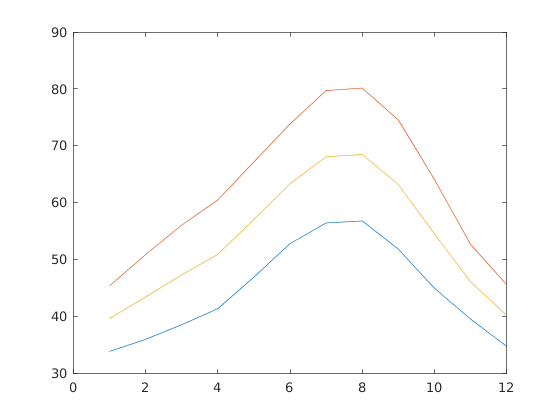

In [9]:
% Zur besseren Lesbarkeit werden die einzelnen Spalten Variablen mit
% aussagekräftigen Namen zugewiesen.
month = ptld_imp.data(:, 1); % Monatsnummer
Tmax = ptld_imp.data(:, 2); % Höchsttemperatur
Tmin = ptld_imp.data(:, 3); % niedrigste Temperatur
Tavg = ptld_imp.data(:, 4); % Durchschnittstemperatur
plot(month , Tmin , month , Tmax , month , Tavg)

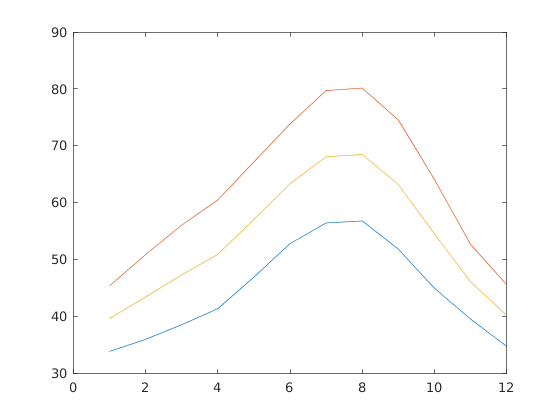

In [10]:
% Alternativ können die Zeitreihen auf derselben Y-Achse folgendermaßen 
% zusammengefasst werden:
plot(month, [Tmin, Tmax, Tavg])

% Weitere Varianten wären zum Beispiel:
% plot(ptld_imp.data(:,1), ptld_imp.data(:,2:4))
% plot(ptld_imp.data(:,1), ptld_imp.data(:,[2,3,4]))
% line(month, [Tmin, Tmax, Tavg])
% oder folgende Kombination:
% plot(month, Tmin)
% hold on
% plot(month, Tmax)
% plot(month, Tavg)
% hold off

% Sie sehen, viele Wege führen zum Ziel. Probieren Sie sich gerne aus!

#### 2. Visualisieren Sie die Niederschlagsreihe (Tagessummen; zu finden in der Datei **rhb_prec81_dailysums.txt**) der Station *Rietholzbach* in einem Balkendiagramm. Beschriften Sie die Achsen und geben Sie dem Diagramm eine Überschrift.

Lösung:

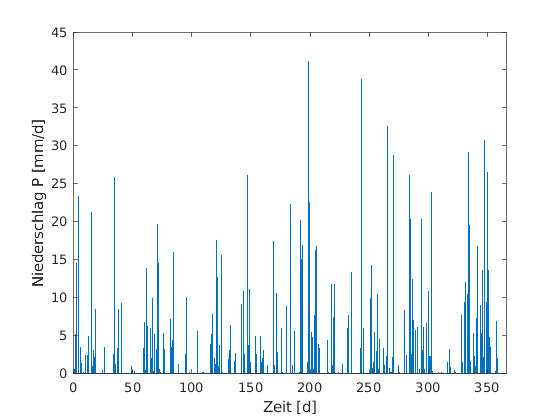

In [11]:
% Daten einlesen
% Die Datei enthält nur Daten , keine Kopfzeilen oder Spaltenbeschriftungen.
% In diesem Fall gibt importdata die Daten direkt als Array aus.
% (Keine Struktur mit Feld "data"!)
rhb_daily = importdata('Daten/rhb_prec81_dailysums.txt');
bar(rhb_daily)
xlabel('Zeit [d]')
ylabel('Niederschlag P [mm/d]')

#### 3. Stellen Sie außerdem die Monatssummen (**rhb_prec81_monthlysums.txt**) in einem Balkendiagramm dar.

Lösung:


rhb_monthly =

  Columns 1 through 7

  101.7000   55.8000  132.8000   38.4000  144.1000   77.6000  205.0000

  Columns 8 through 12

   67.9000  186.3300  188.8900   76.5700  204.4900



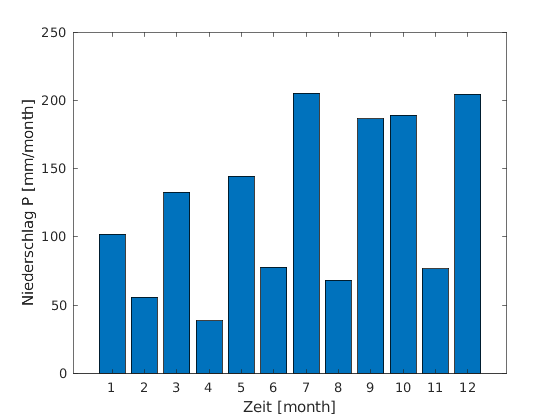

In [12]:
rhb_monthly = importdata('Daten/rhb_prec81_monthlysums.txt')
bar(rhb_monthly);
xlabel('Zeit [month]')
ylabel('Niederschlag P [mm/month]')

#### 4. Exportieren Sie die Plots als .pdf- (oder .eps-) sowie als .jpg-Datei. Öffnen Sie die exportierten Grafiken und Bewerten Sie die Qualität der Ausgabe.  
  
**Hinweis:**  
Standardmäßig wird der Plot in diesem Jupyter Notebook direkt im Notebook zwischen den Zellen angezeigt ("inline"), nicht wie in Matlab in einem extra Fenster ("native").  
Wenn Sie nun in der nächsten Zelle durch einen Handle auf den vorangegangenen Plot referenzieren wollen (Zelle zuvor: **HANDLE = figure()** vor dem plot-Befehl) oder durch **gcf** ("get current figure"-handle), dann ist dieser Handle in der neuen Zelle nicht mehr abrufbar. Dies hat damit zu tun, dass die Figure "inline" geplottet wurde und außerhalb ihrer Position als "wieder geschlossen/gelöscht" gilt.  
  
Dieses Problem kann man dadurch umgehen, dass der Befehl mit der Referenz auf den Handle dieser Figure in derselben Zelle ausgeführt wird wie der Plot. Ob Sie die hier darunter gegebene Zelle dafür nutzen oder in Ihrer Plot-Zelle der vorhergehenden Aufgabe weiter schreiben, ist egal.  
Eine Alternative dazu ist, dass Sie folgenden "magic command" in diesem Notebook eingeben (Stelle irrelevant, Hauptsache vor dem Plotten): **%plot native**  
Dadurch öffnet sich für Jupyter Lab beim Plotten theoretisch ein extra Matlab-Fenster (welches Sie hier leider nicht sehen können), welches auch außerhalb der Zellen bestehen bleibt. Darauf können sie über einen Handle in jeder beliebigen Zelle referenzieren. Vergessen Sie nicht, die "unsichtbar" geöffneten Fenster durch den Befehl **close all** wieder zu schließen, wenn Sie mit ihren Aufgaben fertig sind.

Lösung:

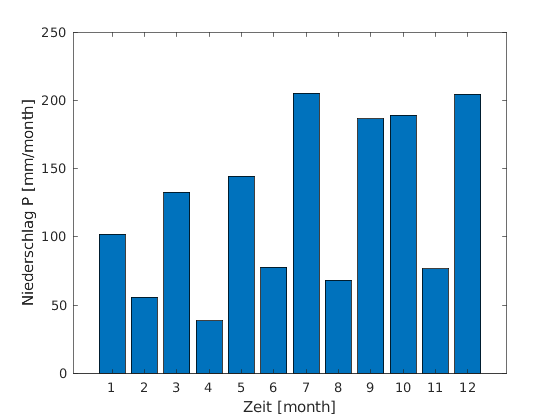

In [13]:
bar(rhb_monthly);
xlabel('Zeit [month]')
ylabel('Niederschlag P [mm/month]')

% pdf und eps sind Vektorgrafikformate und bieten die Möglichkeit einen
% Ausschnitt beliebig zu vergrößern ohne Artefakte zu erhalten.
saveas(gcf, 'rhb_prec81_monthlysums.pdf')
% 
% jpg ist ein Rastergrafikformat mit einer festen Auflösung , diese muss beim
% Erstellen der Grafik ausreichend groß gewählt werden.
saveas(gcf, 'rhb_prec81_monthlysums.jpg')

## Grafik und Visualisierung - fortgeschritten

#### 1. Plotten Sie die durchschnittlichen Monatswerte der Station Portland Int. Airport in verschiedenen Diagrammen. Ermitteln Sie mit Hilfe von Handles verschiedene Eigenschaften der Plots (Liniendicke, Linienstil, Farbe, etc.) und ändern Sie diese. Experimentieren Sie mit verschiedenen Einstellungen und Varianten.

Lösung:

    AlignVertexCenters: off
            Annotation: [1x1 matlab.graphics.eventdata.Annotation]
          BeingDeleted: off
            BusyAction: 'queue'
         ButtonDownFcn: ''
              Children: [0x0 GraphicsPlaceholder]
              Clipping: on
                 Color: [0 0.4470 0.7410]
             ColorMode: 'auto'
           ContextMenu: [0x0 GraphicsPlaceholder]
             CreateFcn: ''
       DataTipTemplate: [1x1 matlab.graphics.datatip.DataTipTemplate]
             DeleteFcn: ''
           DisplayName: ''
      HandleVisibility: 'on'
               HitTest: on
         Interruptible: on
              LineJoin: 'round'
             LineStyle: '-'
         LineStyleMode: 'auto'
             LineWidth: 0.5000
                Marker: 'none'
       MarkerEdgeColor: 'auto'
       MarkerFaceColor: 'none'
         MarkerIndices: [1 2 3 4 5 6 7 8 9 10 11 12]
            MarkerMode: 'auto'
            MarkerSize: 6
                Parent: [1x1 Axes]
         PickableParts: 

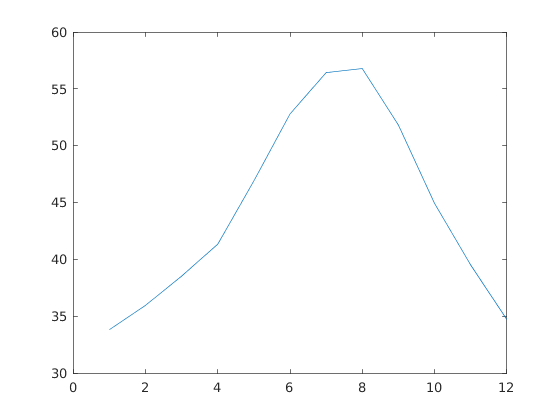

In [36]:
% ph1 ist ein handle für die mit dem plot Befehl erzeugte Linie.
ph1 = plot(month , Tmin);
% Mit get kann man sich alle Eigenschaften anzeigen lassen.
get(ph1)
% ... oder den Wert einer bestimmten Eigenschaft abfragen.
get(ph1, 'LineStyle')
get(ph1, 'LineWidth')

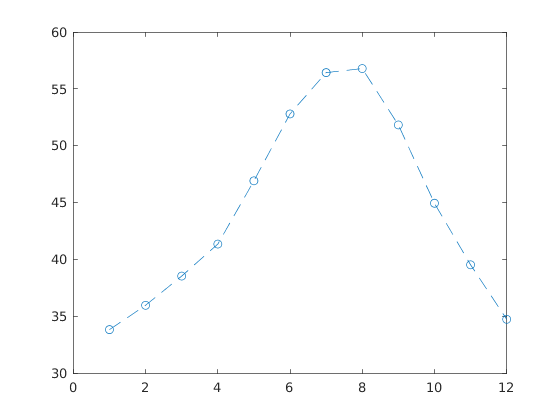

In [34]:
% mit set können Werte geändert werden
ph2 = plot(month , Tmin);
set(ph2, 'LineStyle', '--', 'Marker', 'o')

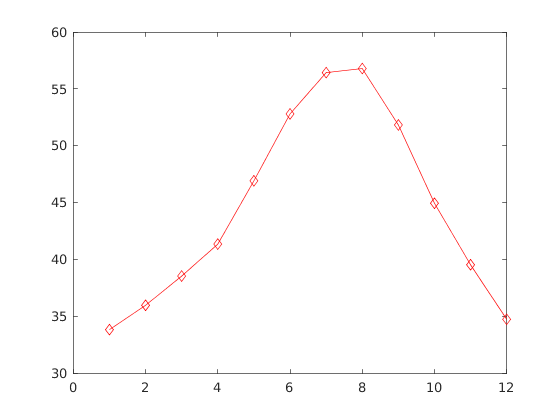

In [35]:
% Ab Matlab 2014b wird auch eine Punktnotation für die Eigenschaften 1
% unterstützt.
ph3 = plot(month , Tmin);
ph3.Marker = 'd';
ph3.Color = 'r';

#### 2. Importieren Sie die Abflussdaten der Station Rietholzbach. Stündliche Auflösung in **rhb_q81.tab**.

Lösung:

In [48]:
rhb_Q_in = importdata('Daten/rhb_q81.tab', '\t', 5)
Q = rhb_Q_in.data(:, 5);


rhb_Q_in = 

  struct with fields:

          data: [8760x5 double]
      textdata: {5x5 cell}
    colheaders: {'YY'  'MM'  'DD'  'HH'  'Mosnang'}



#### 3. Plotten Sie die Abflussganglinie und die Niederschläge in ein Diagramm. Abfluss soll auf die Primär- und Niederschlag auf die Sekundärachse geplottet werden (wahlweise als Balkendiagramm). Die Ordinate des Niederschlags soll gedreht werden.

Lösung:

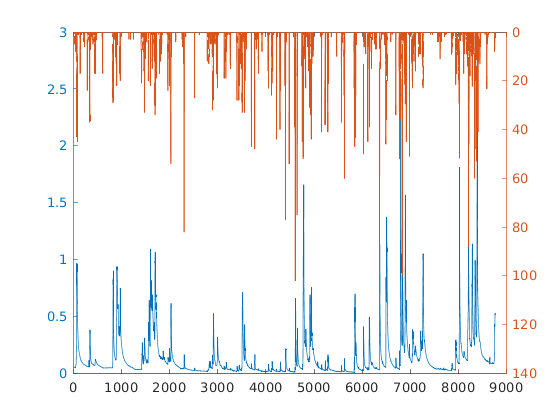

In [49]:
% Erzeuge Vektor für die Stundenzahl.
h = (1:numel(Q));
% Vorbereitung zum Plotten mit zwei Y-Achsen , linke Achse aktivieren
yyaxis left
plot(h, Q)
% rechte Achse aktivieren
yyaxis right
plot(h, P)
% Richtung der Y-Achse auf der rechten Seite umkehren.
a = gca();
a.YDir = 'reverse';

#### 4. Importieren Sie das DGM des Rietholzbaches (**rhb50.dem**). Ersetzen Sie den Wert ’-9999’ in den Daten mit dem kleinsten regulären Wert, also der Höhe des Gebietsauslasses. Visualisieren Sie die Daten mit den Funktionen **imagesc**, **contour** und **surf**.

Lösung:

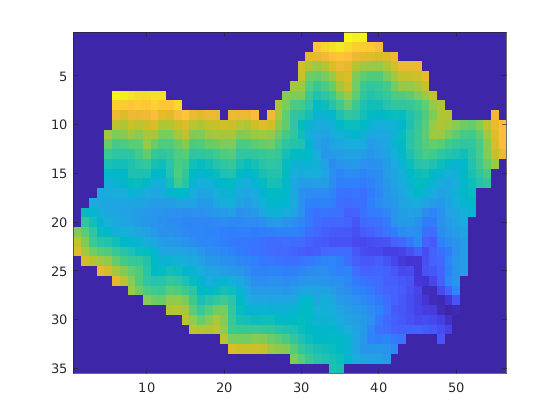

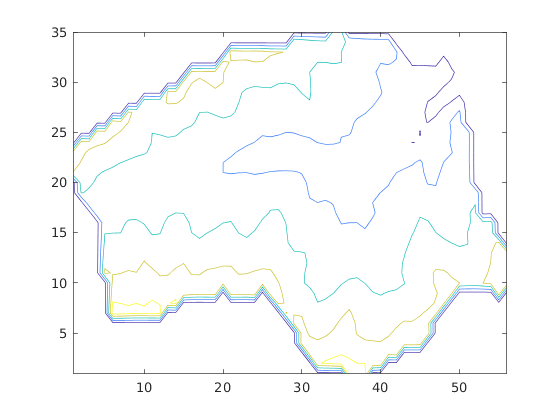

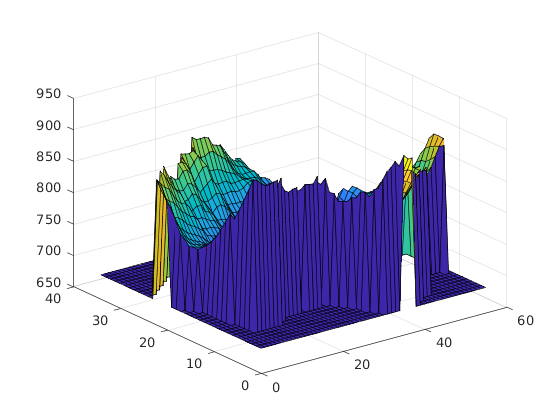

In [58]:
dgm_in = importdata('Daten/rhb50.dem', '\t', 6);
dgm = dgm_in.data;
% Positionen der Fehldaten bestimmen , idx_nodata ist vom Datentyp logical
idx_nodata = (dgm == -9999);
% Ersetze alle Fehlwerte (Werte = -9999) mit dem kleinsten regulären Wert
% Der Operator "~" kehrt das logical Array um. "~idx_nodata" enthält alle
% Positionen an den das Array "dgm" einen Wert verschieden von -9999 hat.
dgm(idx_nodata) = min(dgm(~idx_nodata));
% einfache 2D Darstellung mit imagesc
figure(1); 
imagesc(dgm)
% Contourplot mit contour
figure(2)
contour(dgm)
% Surfaceplot mit surf
figure(3)
surf(dgm) % in Matlab lässt sich diese 3D-Grafik frei drehen

#### 5. Nutzen Sie die Funktion **interp2** um auf eine höhere räumliche Auflösung zu interpolieren (dgmFine = interp2(dgmCoarse,4);). Visualisieren Sie die Daten erneut. Lassen Sie sich den Speicherverbrauch des originalen und des interpolierten DGMs anzeigen.

Lösung:

  Name       Size             Bytes  Class     Attributes

  dgm       35x56             15680  double              
  dgm2      69x111            61272  double              



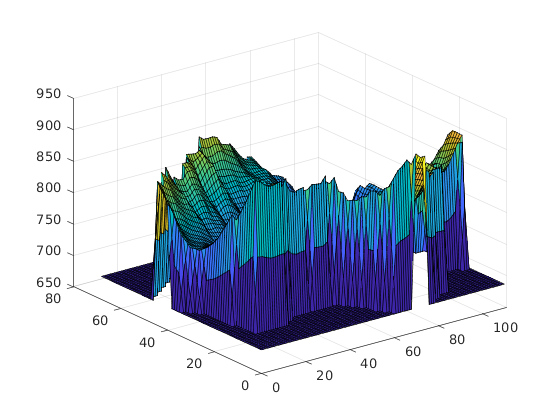

In [57]:
% In der hier aufgerufenen Form halbiert interp2 den Abstand zwischen
% benachbarten Datenpunkten und interpoliert den Wert für die neue Position aus
% den Nachbardaten.
dgm2 = interp2(dgm, 1);
% Bei einem 2D Array führt eine Verdopplung der Datenpunkte in beiden Dimensionen
% zu dem 4-fachen Speicherverbrauch.
whos dgm dgm2
surf(dgm2)